In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#from sklearn.tree import DecisionTreeRegressor
#from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import r2_score

In [2]:
#lendo dados
df = pd.read_csv("vss_xyz_dia_2017-2019",index_col=0)
#convertendo para datetime
df.DATE = pd.to_datetime(df.DATE)
#definindo DATA como index
df.set_index('DATE',inplace=True)
df.head()

,TIME,DOY,VSSX,VSSY,VSSZ,VSSG,F
DATE,,,,,,,
2017-01-01,00:00:00.000,1,16701.6,-6959.5,-14647.2,-0.3,23279.144113
2017-01-02,00:00:00.000,2,16714.7,-6967.7,-14644.2,-0.3,23289.109752
2017-01-03,00:00:00.000,3,16716.4,-6964.4,-14645.7,-0.2,23290.286061
2017-01-04,00:00:00.000,4,16710.7,-6959.6,-14647.0,-0.3,23285.577847
2017-01-05,00:00:00.000,5,16691.8,-6967.6,-14650.9,-0.4,23276.866366


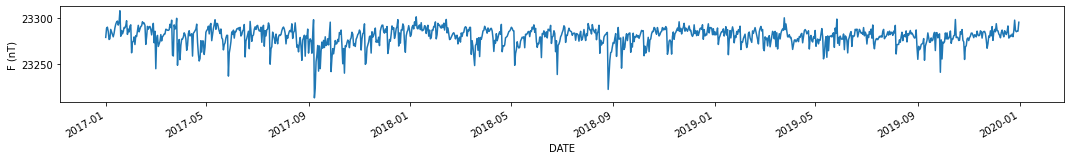

In [3]:
#visualizando
plt.figure(figsize=(18,9))

plt.subplot(4,1,1)
df.F.plot()
plt.ylabel("F (nT)")

plt.show()

In [4]:
x = df.index.values
y = df.F.values

In [5]:
#separando dados de treino e de teste
train_size = int(len(x) * 9/10)
x_train = x[:train_size]
x_test = x[train_size:]
y_train = y[:train_size]
y_test = y[train_size:]

In [6]:
# p ordem do polinômio autorregressivo
# d é o número de diferenças necessárias para retirar a tendência
# q é a ordem do polinômio de médias móveis
pdq = (0,1,0)
# P é é a ordem do polinômio sazonal autorregressivo
# D é o número de diferenças de “lag” necessárias  para  retirar  a  sazonalidade  da  série
# Q é a ordem do polinômio  sazonal  de  médias  móveis
PDQs = (2,2,1,7)

In [7]:
#construindo modelo
model = SARIMAX(y_train, order=pdq,seasonal_order=PDQs)
model_fit = model.fit()
print(model_fit.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  972
Model:             SARIMAX(0, 1, 0)x(2, 2, [1], 7)   Log Likelihood               -3807.401
Date:                             Sat, 19 Dec 2020   AIC                           7622.803
Time:                                     17:31:50   BIC                           7642.258
Sample:                                          0   HQIC                          7630.213
                                             - 972                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L7       -0.6132      0.024    -25.837      0.000      -0.660      -0.567
ar.S.L14      -0.3314      

In [8]:
#predict
start = len(x_train)
end = start+len(x_test)-1
y_predict = model_fit.predict(start=start,end=end,dynamics=True)

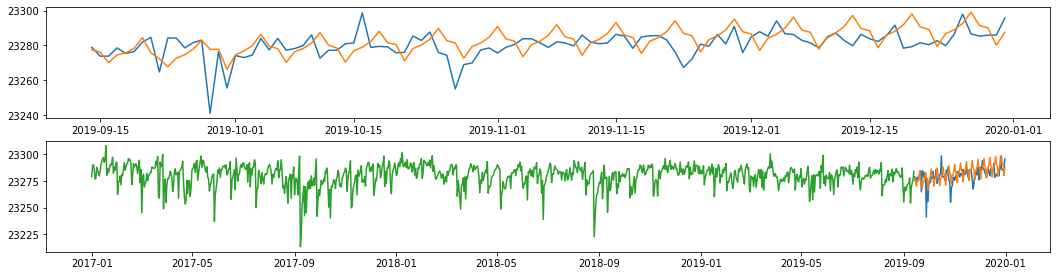

In [9]:
plt.figure(figsize=(18,9/2))

plt.subplot(2,1,1)
plt.plot(x_test,y_test)
plt.plot(x_test,y_predict)

plt.subplot(2,1,2)
plt.plot(x_test,y_test)
plt.plot(x_test,y_predict)
plt.plot(x_train,y_train)

plt.show()